In [2]:
import keras
from keras.layers import Activation, Dense, Dropout, Conv2D, \
                         Flatten, MaxPooling2D
from keras.models import Sequential
import librosa
import librosa.display
import numpy as np
import pandas as pd
import random

import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [28]:
df = pd.read_csv(r'D:\datas\urban8k\UrbanSound8K\metadata\UrbanSound8K.csv')
df.head(20)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
5,100263-2-0-143.wav,100263,71.500000,75.500000,1,5,2,children_playing
6,100263-2-0-161.wav,100263,80.500000,84.500000,1,5,2,children_playing
7,100263-2-0-3.wav,100263,1.500000,5.500000,1,5,2,children_playing
8,100263-2-0-36.wav,100263,18.000000,22.000000,1,5,2,children_playing
9,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn


In [4]:
data.shape

(8732, 8)

In [5]:
valid_data = data[['slice_file_name', 'fold' ,'classID', 'class']][ data['end']-data['start'] >= 3 ]
valid_data.shape

(7468, 4)

In [6]:
y, sr = librosa.load(r'D:\datas\urban8k\UrbanSound8K\audio\fold6\135160-8-0-0.wav', duration=2.97)
ps = librosa.feature.melspectrogram(y=y, sr=sr)
ps.shape

(128, 128)

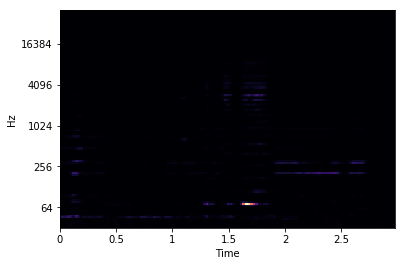

In [35]:
librosa.display.specshow(ps, y_axis='cqt_hz', x_axis='time')


In [8]:
y, sr = librosa.load(r'D:\datas\urban8k\UrbanSound8K\audio\fold1\134717-0-0-19.wav', duration=2.97)
ps = librosa.feature.melspectrogram(y=y, sr=sr)
ps.shape

(128, 128)

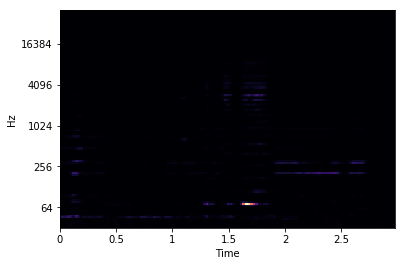

In [32]:
librosa.display.specshow(ps, y_axis='cqt_hz', x_axis='time')


In [10]:
y, sr = librosa.load(r'D:\datas\urban8k\UrbanSound8K\audio\fold9\13579-2-0-16.wav', duration=2.97)
ps = librosa.feature.melspectrogram(y=y, sr=sr)
ps.shape

(128, 128)

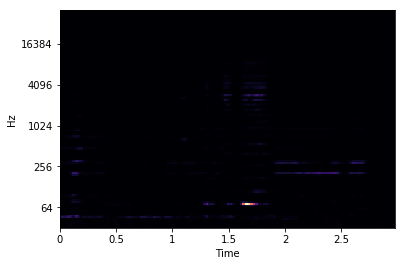

In [31]:
librosa.display.specshow(ps, y_axis='cqt_hz', x_axis='time')


In [12]:
y, sr = librosa.load(r'D:/datas/urban8k/UrbanSound8K/audio/fold9/137815-4-0-0.wav', duration=2.97)
ps = librosa.feature.melspectrogram(y=y, sr=sr)
ps.shape

(128, 128)

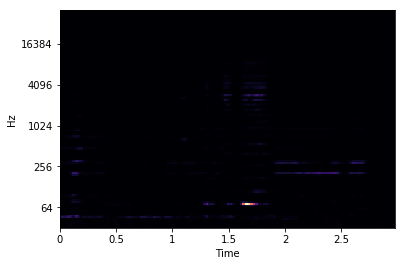

In [33]:
librosa.display.specshow(ps, y_axis='cqt_hz', x_axis='time')


In [14]:
valid_data['path'] = 'fold' + valid_data['fold'].astype('str') + '/' + valid_data['slice_file_name'].astype('str')


In [15]:
D = []
for row in valid_data.itertuples():
    y, sr = librosa.load(r'D:/datas/urban8k/UrbanSound8K/audio/' + row.path, duration=2.97)  
    ps = librosa.feature.melspectrogram(y=y, sr=sr)
    if ps.shape != (128, 128): continue
    D.append( (ps, row.classID) )

In [16]:
print("Number of samples: ", len(D))


Number of samples:  7467


In [17]:
dataset = D
random.shuffle(dataset)
train = dataset[:7000]
test = dataset[7000:]
X_train, y_train = zip(*train)
X_test, y_test = zip(*test)
X_train = np.array([x.reshape( (128, 128, 1) ) for x in X_train])
X_test = np.array([x.reshape( (128, 128, 1) ) for x in X_test])
y_train = np.array(keras.utils.to_categorical(y_train, 10))
y_test = np.array(keras.utils.to_categorical(y_test, 10))

In [18]:
model = Sequential()
input_shape=(128, 128, 1)

model.add(Conv2D(24, (5, 5), strides=(1, 1), input_shape=input_shape))
model.add(MaxPooling2D((4, 2), strides=(4, 2)))
model.add(Activation('relu'))

model.add(Conv2D(48, (5, 5), padding="valid"))
model.add(MaxPooling2D((4, 2), strides=(4, 2)))
model.add(Activation('relu'))

model.add(Conv2D(48, (5, 5), padding="valid"))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dropout(rate=0.5))

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(rate=0.5))

model.add(Dense(10))
model.add(Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [19]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 124, 124, 24)      624       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 62, 24)        0         
_________________________________________________________________
activation_1 (Activation)    (None, 31, 62, 24)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 27, 58, 48)        28848     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 29, 48)         0         
_________________________________________________________________
activation_2 (Activation)    (None, 6, 29, 48)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 2, 25, 48)         57648     
__________

In [24]:
model.compile(
    optimizer="Adam",
    loss="categorical_crossentropy",
    metrics=['accuracy'])

history =model.fit(
    x=X_train, 
    y=y_train,
    epochs=100,
    batch_size=128,
    validation_data= (X_test, y_test))

score = model.evaluate(
    x=X_test,
    y=y_test)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 7000 samples, validate on 467 samples
Epoch 1/100
7000/7000 [==============================] - 4s 578us/step - loss: 0.1881 - acc: 0.9459 - val_loss: 0.5311 - val_acc: 0.8951
Epoch 2/100
7000/7000 [==============================] - 3s 436us/step - loss: 0.1887 - acc: 0.9434 - val_loss: 0.5252 - val_acc: 0.8972
Epoch 3/100
7000/7000 [==============================] - 3s 436us/step - loss: 0.2573 - acc: 0.9250 - val_loss: 0.6604 - val_acc: 0.8822
Epoch 4/100
7000/7000 [==============================] - 3s 441us/step - loss: 0.2117 - acc: 0.9414 - val_loss: 0.5371 - val_acc: 0.8801
Epoch 5/100
7000/7000 [==============================] - 3s 447us/step - loss: 0.1992 - acc: 0.9453 - val_loss: 0.5478 - val_acc: 0.8715
Epoch 6/100
7000/7000 [==============================] - 3s 440us/step - loss: 0.1973 - acc: 0.9440 - val_loss: 0.6787 - val_acc: 0.8737
Epoch 7/100
7000/7000 [==============================] - 3s 436us/step - loss: 0.2289 - acc: 0.9406 - val_loss: 0.5790 - val_acc: 0

7000/7000 [==============================] - 3s 438us/step - loss: 0.1854 - acc: 0.9487 - val_loss: 0.7616 - val_acc: 0.8779
Epoch 61/100
7000/7000 [==============================] - 3s 437us/step - loss: 0.1487 - acc: 0.9551 - val_loss: 0.6328 - val_acc: 0.8908
Epoch 62/100
7000/7000 [==============================] - 3s 438us/step - loss: 0.2875 - acc: 0.9330 - val_loss: 0.7387 - val_acc: 0.8737
Epoch 63/100
7000/7000 [==============================] - 3s 437us/step - loss: 0.1899 - acc: 0.9497 - val_loss: 0.6086 - val_acc: 0.8887
Epoch 64/100
7000/7000 [==============================] - 3s 436us/step - loss: 0.2094 - acc: 0.9440 - val_loss: 0.5188 - val_acc: 0.8929
Epoch 65/100
7000/7000 [==============================] - 3s 436us/step - loss: 0.1491 - acc: 0.9581 - val_loss: 0.7204 - val_acc: 0.8865
Epoch 66/100
7000/7000 [==============================] - 3s 437us/step - loss: 0.2323 - acc: 0.9396 - val_loss: 0.5271 - val_acc: 0.8887
Epoch 67/100
7000/7000 [=======================

In [25]:
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


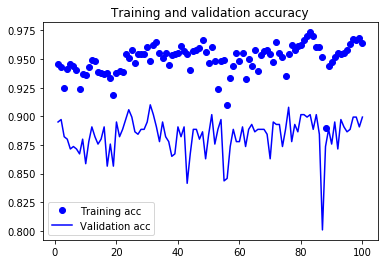

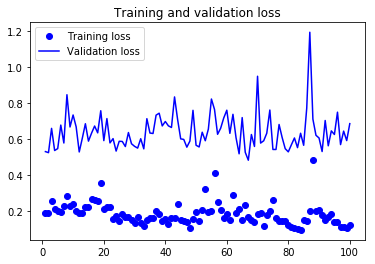

In [26]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()